# FML Capstone Project

### Importing packages

In [282]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn import tree
print("packges imported")

packges imported


In [283]:
random_seed = random.seed(16093457)

## Importing data

In [284]:
music_df = pd.read_csv("musicData.csv")
music_np = music_df.to_numpy()
print("data loaded")

data loaded


In [285]:
tempo = music_np[:, 14]
len(tempo[tempo == '?'])
tempo

array(['100.889', '115.00200000000001', '127.994', ..., '131.079',
       '75.88600000000001', '99.20100000000001'], dtype=object)

### Cleaning data

Handling NAN

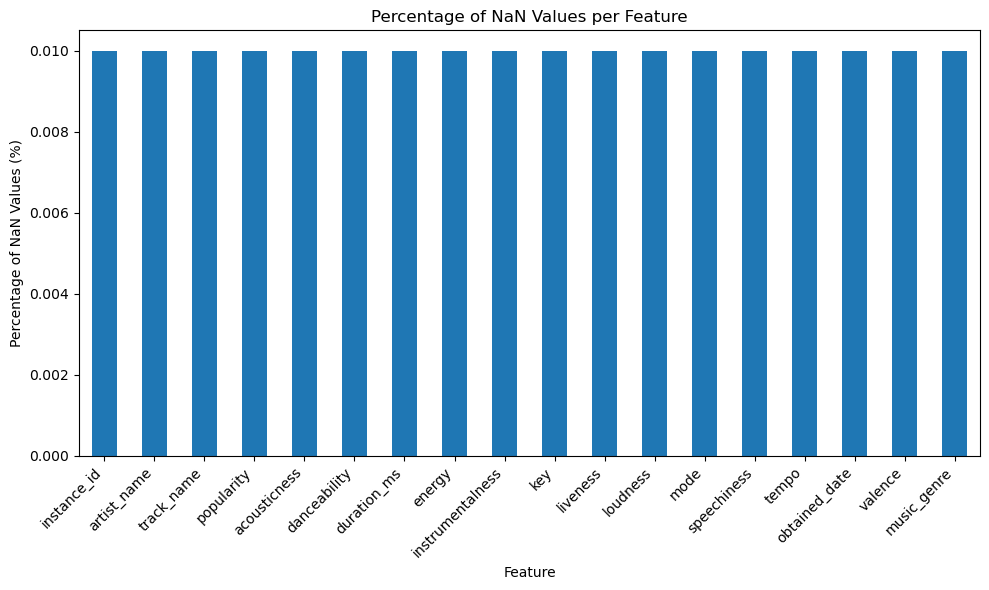

NaN percentages plotted.
instance_id         0.009999
artist_name         0.009999
track_name          0.009999
popularity          0.009999
acousticness        0.009999
danceability        0.009999
duration_ms         0.009999
energy              0.009999
instrumentalness    0.009999
key                 0.009999
liveness            0.009999
loudness            0.009999
mode                0.009999
speechiness         0.009999
tempo               0.009999
obtained_date       0.009999
valence             0.009999
music_genre         0.009999
dtype: float64


In [286]:
# Calculate the proportion of NaN values for each column and convert to percentage
nan_percentages = (music_df.isnull().sum() / len(music_df)) * 100

# Plot the percentages
plt.figure(figsize=(10, 6))
nan_percentages.plot(kind='bar')
plt.title('Percentage of NaN Values per Feature')
plt.xlabel('Feature')
plt.ylabel('Percentage of NaN Values (%)') # Updated label
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("NaN percentages plotted.")
print(nan_percentages)

In [287]:
# Drop rows with any NaN values from the DataFrame first
music_df_cleaned = music_df.dropna()
# Convert the cleaned DataFrame to a NumPy array
music_np_clean = music_df_cleaned.to_numpy()

# Display the shape of the original and cleaned arrays to verify
print("Original music_np shape:", music_np.shape)
print("Cleaned music_np_clean shape:", music_np_clean.shape)

Original music_np shape: (50005, 18)
Cleaned music_np_clean shape: (50000, 18)


Features

In [288]:
spotifyID = music_np_clean[:, 0]
artist_name = music_np_clean[:, 1]
song_name = music_np_clean[:, 2]
popularity = music_np_clean[:, 3]
acousticness = music_np_clean[:, 4]
danceability = music_np_clean[:, 5]
duration_ms = music_np_clean[:, 6]
energy = music_np_clean[:, 7]
instrumentalness = music_np_clean[:, 8]
key = music_np_clean[:, 9]
liveness = music_np_clean[:, 10]
loudness = music_np_clean[:, 11]
mode = music_np_clean[:, 12]
speechiness = music_np_clean[:, 13]
tempo = music_np_clean[:, 14]
date_obtained = music_np_clean[:, 15]
valence = music_np_clean[:, 16]
genre = music_np_clean[:, 17]

Dummy coding keys

In [289]:
print(sorted(music_df_cleaned["key"].unique()[:-1]))

['A', 'A#', 'B', 'C', 'C#', 'D', 'E', 'F', 'F#', 'G', 'G#']


In [290]:
key_codes = {
    'A' : 1,
    'A#' : 2,
    'B' : 3,
    'C' : 4,
    'C#' : 5,
    'D' : 6,
    'D#' : 7,
    'E' : 8,
    'F' : 9,
    'F#' : 10,
    'G' : 11,
    'G#' : 12
}

key_dummy_coded = music_df_cleaned["key"].map(key_codes).to_numpy()
key_dummy_coded

array([ 2,  6, 12, ...,  6, 11, 10])

Dummy coding mode

In [291]:
mode_dummy_coded = music_df_cleaned["mode"].map({'Major': 0, 'Minor': 1}).to_numpy()
mode_dummy_coded

array([1, 1, 0, ..., 0, 1, 1])

Imputing tempo

In [292]:
tempo

tempo = np.where(tempo == '?', np.nan, tempo).astype(float)


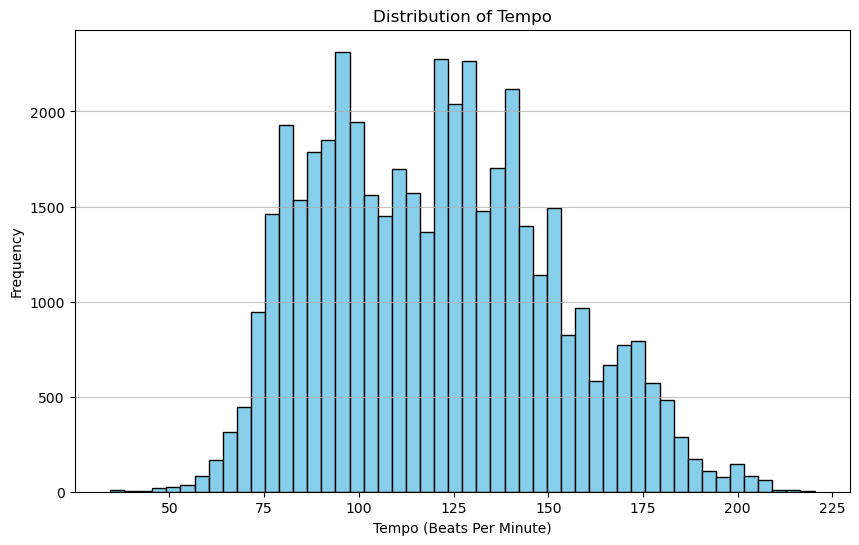

Tempo distribution plotted.


In [293]:
# Plot the distribution of the cleaned tempo data
plt.figure(figsize=(10, 6))
plt.hist(tempo, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (Beats Per Minute)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Tempo distribution plotted.")

In [294]:
print("Tempo Median:", np.nanmedian(tempo))
print("Tempo Mean:", np.nanmean(tempo))

Tempo Median: 119.87899999999999
Tempo Mean: 119.95296059529099


In [ ]:
tempo_clean = np.nan_to_num(tempo, nan=np.nanmedian(tempo))

Cleaning duration

In [296]:
duration_ms = np.where(duration_ms == -1, np.nan, duration_ms).astype(float)

In [297]:
print("Duration Median:", np.nanmedian(duration_ms))
print("Duration Mean:", np.nanmean(duration_ms))

Duration Median: 227360.0
Duration Mean: 245503.54146601274


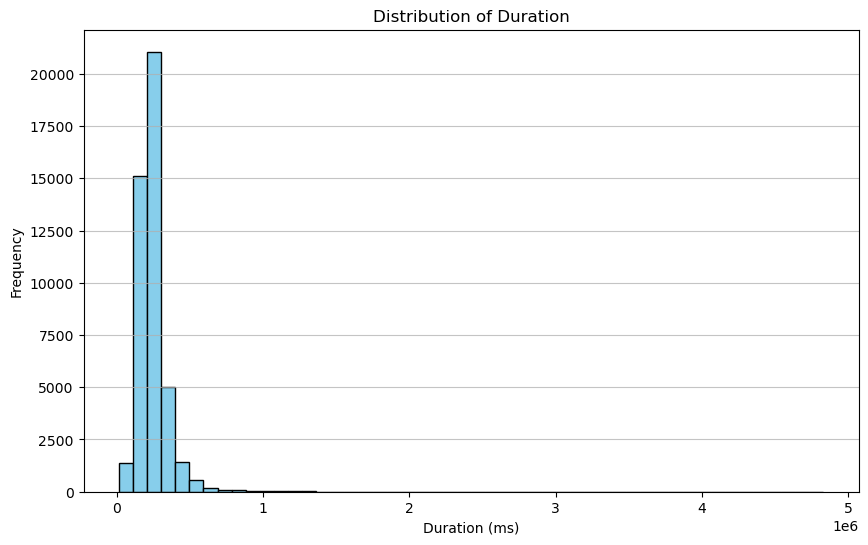

Duration distribution plotted.


In [298]:
plt.figure(figsize=(10, 6))
plt.hist(duration_ms, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Duration distribution plotted.")

In [299]:
duration_ms_clean = np.nan_to_num(duration_ms, nan=np.nanmedian(duration_ms))

Dummy coding date

In [300]:
print(music_df_cleaned["obtained_date"].unique())

def date_coding(date):
    return int(date[0])

obtained_date_dummy_coded = music_df_cleaned["obtained_date"].map(date_coding).to_numpy()
obtained_date_dummy_coded

['4-Apr' '3-Apr' '5-Apr' '1-Apr' '0/4']


array([4, 4, 4, ..., 4, 4, 4])

Dummy coding genres

In [301]:
print(music_df_cleaned["music_genre"].unique())

['Electronic' 'Anime' 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop']


In [302]:
genre_codes = {
    'Electronic': 0,
    'Anime': 1,
    'Jazz' : 2,
    'Alternative': 3,
    'Country': 4,
    'Rap': 5,
    'Blues': 6,
    'Rock': 7,
    'Classical': 8,
    'Hip-Hop': 9,
}

genre_dummy_coded = music_df_cleaned["music_genre"].map(genre_codes).to_numpy()
genre_dummy_coded

array([0, 0, 0, ..., 9, 9, 9])

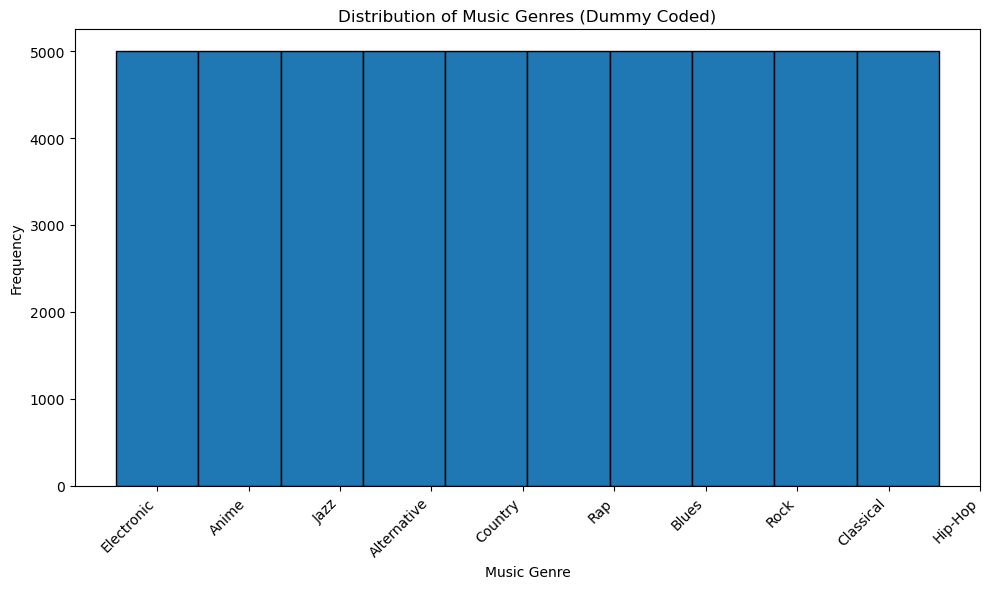

Genre distribution plotted.


In [303]:
plt.figure(figsize=(10, 6))
plt.hist(genre_dummy_coded, bins=len(np.unique(genre_dummy_coded)), edgecolor='black', align='left')

# Create a mapping from genre codes to genre names for ticks
genre_names_map = {v: k for k, v in genre_codes.items()}
tick_labels = [genre_names_map[i] for i in sorted(np.unique(genre_dummy_coded))]

plt.xticks(ticks=sorted(np.unique(genre_dummy_coded)), labels=tick_labels, rotation=45, ha='right')
plt.xlabel('Music Genre')
plt.ylabel('Frequency')
plt.title('Distribution of Music Genres (Dummy Coded)')
plt.tight_layout()
plt.show()

print("Genre distribution plotted.")

### Splitting train/test data

In [304]:
data = np.column_stack((
    popularity,
    acousticness,
    danceability,
    duration_ms_clean,
    energy,
    instrumentalness,
    liveness,
    loudness,
    speechiness,
    tempo_clean,
    valence,
    key_dummy_coded,
    mode_dummy_coded
))

genres = np.unique(genre_dummy_coded)
X_train = np.empty((0, data.shape[1]))
X_test = np.empty((0, data.shape[1]))
y_train = np.empty((0,))
y_test = np.empty((0,))

for genre in genres:
    genre_data = data[genre_dummy_coded == genre]
    genre_labels = genre_dummy_coded[genre_dummy_coded == genre]
    X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(
        genre_data,
        genre_labels,
        test_size=0.1,
        random_state=random_seed   
    )
    X_train = np.vstack((X_train, X_train_genre))
    X_test = np.vstack((X_test, X_test_genre))
    y_train = np.concatenate((y_train, y_train_genre))
    y_test = np.concatenate((y_test, y_test_genre))

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 45000
Test set size: 5000


## Dimensionality reduction

Predictors
    spotifyID
    artistname
    song_name
    popularity
    acousticness
    danceability
    duration
    energy
    instrumentality
    key
    liveness
    loudness
    mode
    speechiness
    tempo
    obtained date
    valence

labels: genre

Standardizing predictors

In [305]:
from sklearn.preprocessing import StandardScaler

# Standardize the features excetpt for categorical ones: key, mode 
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train[:, :11])
X_train_scaled.shape

(45000, 11)

In [306]:
X_train_scaled = np.column_stack((X_train_scaled, X_train[:, 11: ]))  # Adding key and mode dummy coded features

In [307]:
feature_names = [
    "popularity",
    "acousticness",
    "danceability",
    "duration_ms",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "tempo",
    "valence",
    "key",
    "mode"
]

In [308]:
print(X_train_scaled.shape)

(45000, 13)


MDS: Too slow

### Trying pca

In [309]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

Eigenvalues:  [11.97194306  3.7064458   1.34899821  1.05483839  0.97378722  0.94511394
  0.81998202  0.73341177  0.59556694  0.46052775  0.25654569  0.22317032
  0.11036809]
Number of components with eigenvalue > 1:  4


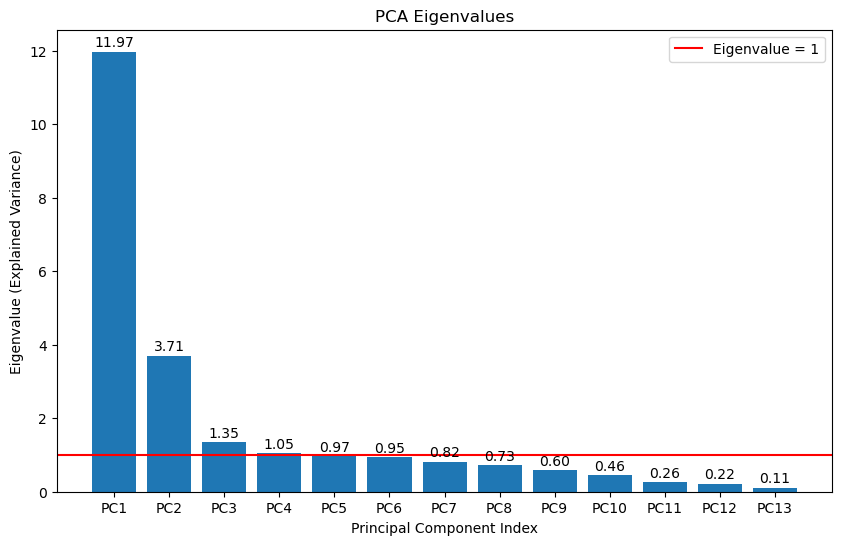

Variance Ratio:  [0.51601648 0.15975578 0.05814472 0.0454658  0.04197232 0.04073644
 0.03534299 0.03161162 0.02567022 0.01984974 0.01105767 0.00961912
 0.0047571 ]


/var/folders/7t/37ty1g8j1652356k81qf2lv80000gn/T/ipykernel_96707/1568122192.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


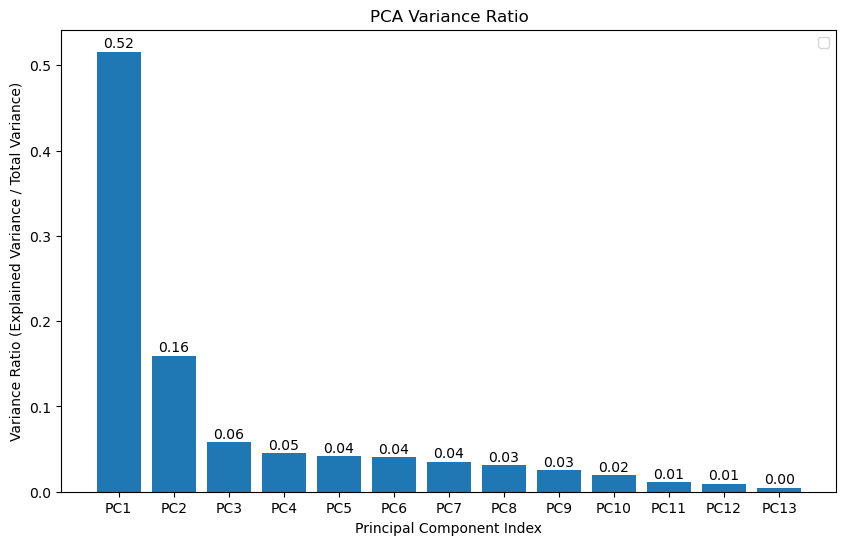

In [310]:
eigenvalues = pca.explained_variance_
kaiser = len(eigenvalues[eigenvalues > 1])
print("Eigenvalues: ", eigenvalues)
print("Number of components with eigenvalue > 1: ", kaiser)
plt.figure(figsize=(10, 6))
plt.bar(range(len(eigenvalues)), eigenvalues, tick_label=[f'PC{i+1}' for i in range(len(eigenvalues))])
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue (Explained Variance)')
# Add labels to the bars
for i, eigenvalue in enumerate(eigenvalues):
    plt.text(i, eigenvalue + 0.05, f'{eigenvalue:.2f}', ha='center', va='bottom')
plt.title('PCA Eigenvalues')
plt.axhline(y=1, color='r', linestyle='-', label='Eigenvalue = 1')
plt.legend()
plt.show()

variance_ratio = pca.explained_variance_ratio_
print("Variance Ratio: ", variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(len(variance_ratio)), variance_ratio, tick_label=[f'PC{i+1}' for i in range(len(variance_ratio))])
plt.xlabel('Principal Component Index')
plt.ylabel('Variance Ratio (Explained Variance / Total Variance)')
# Add labels to the bars
for i, var_ratio in enumerate(variance_ratio):
    plt.text(i, var_ratio + 0.001, f'{var_ratio:.2f}', ha='center', va='bottom')
plt.title('PCA Variance Ratio')
#plt.axhline(y=0.1, color='r', linestyle='-', label='Variance Ratio = 0.1')
plt.legend()
plt.show()

Using Kaiser criterion: Keep the first 4 principle components

['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key', 'mode']


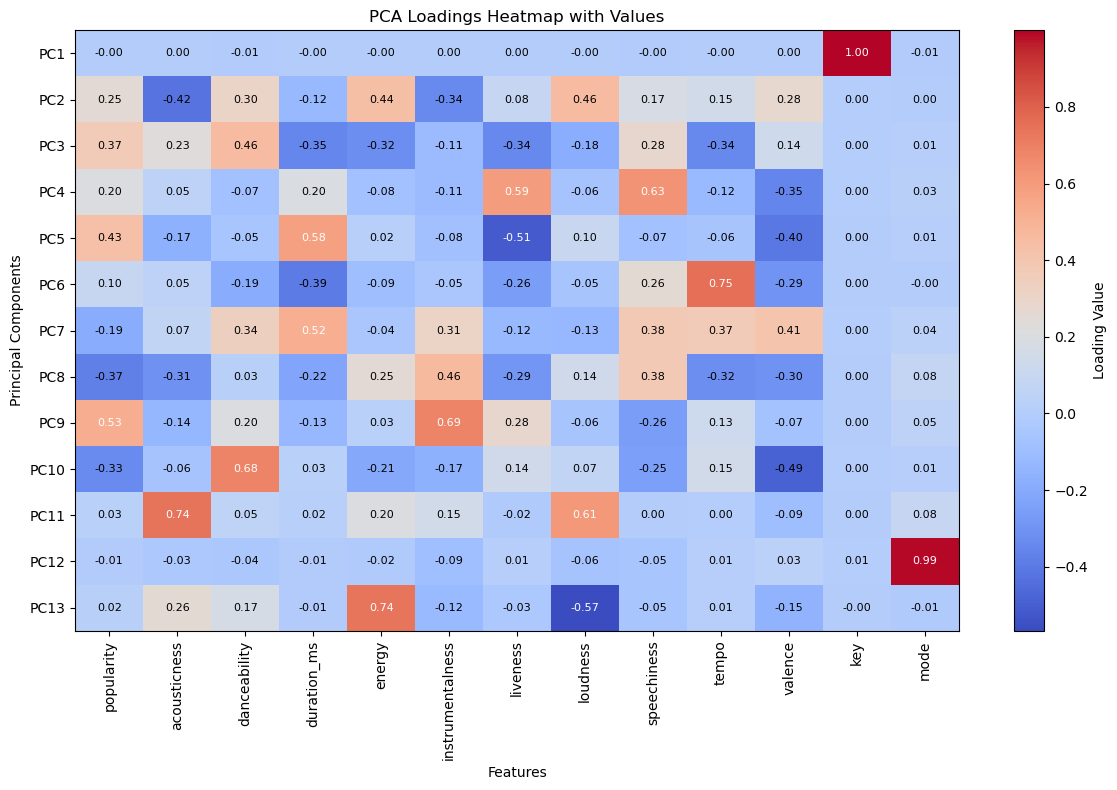

In [311]:
loadings = pca.components_
print(feature_names)
plt.figure(figsize=(12, 8)) # Increased figure size for better label spacing
plt.imshow(loadings, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Loading Value')
plt.xticks(ticks=range(loadings.shape[1]), labels=feature_names, rotation=90)
plt.yticks(ticks=range(loadings.shape[0]), labels=[f'PC{i+1}' for i in range(loadings.shape[0])])
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.title('PCA Loadings Heatmap with Values')

# Add text annotations for loading values
for i in range(loadings.shape[0]): # Loop through principal components (rows)
    for j in range(loadings.shape[1]): # Loop through features (columns)
        # Determine text color based on background brightness for better contrast
        text_color = "white" if abs(loadings[i, j]) > 0.5 else "black" # Adjust threshold as needed
        plt.text(j, i, f'{loadings[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=8)

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

/var/folders/7t/37ty1g8j1652356k81qf2lv80000gn/T/ipykernel_96707/4194574643.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], cmap='viridis', s=50)


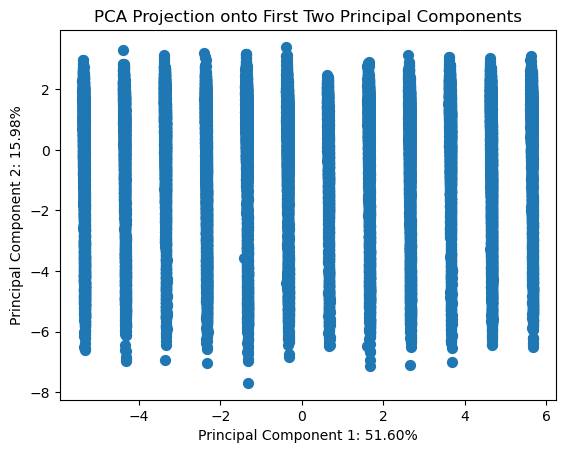

In [312]:
plt.figure()
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], cmap='viridis', s=50)
plt.xlabel('Principal Component 1: {:.2f}%'.format(variance_ratio[0] * 100))
plt.ylabel('Principal Component 2: {:.2f}%'.format(variance_ratio[1] * 100))
plt.title('PCA Projection onto First Two Principal Components')
#plt.colorbar(label='Alcohol Content')
plt.show()

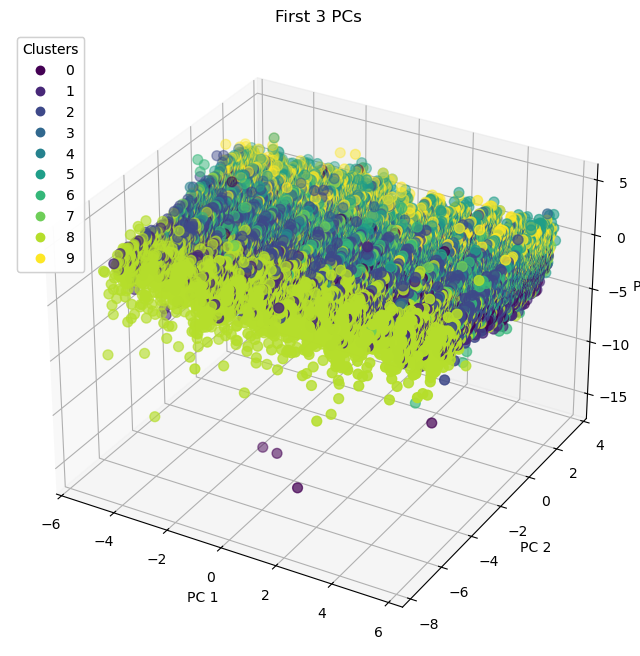

In [313]:
from mpl_toolkits.mplot3d import Axes3D


# Create a figure and a 3D subplot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three principal components
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c = y_train, s=50)

# Set labels and title
ax.set_title(f'First 3 PCs')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

# Add a color bar to show the cluster labels
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

## Applying kMeans

In [314]:
components = X_train_pca[:, :4]
cluster_components = X_train_pca[:, 1:4]

In [315]:
from sklearn.cluster import KMeans
silhouette_scores = []
k = range(2, 15)  # Testing k from 2 to 15
for n_clusters in k:
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed)
    labels = kmeans.fit_predict(cluster_components)
    
    if len(set(labels)) > 1:  # Ensure there are at least 2 clusters to compute silhouette score
        silhouette_avg = metrics.silhouette_score(cluster_components, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  # Assign -1 if only one cluster is found

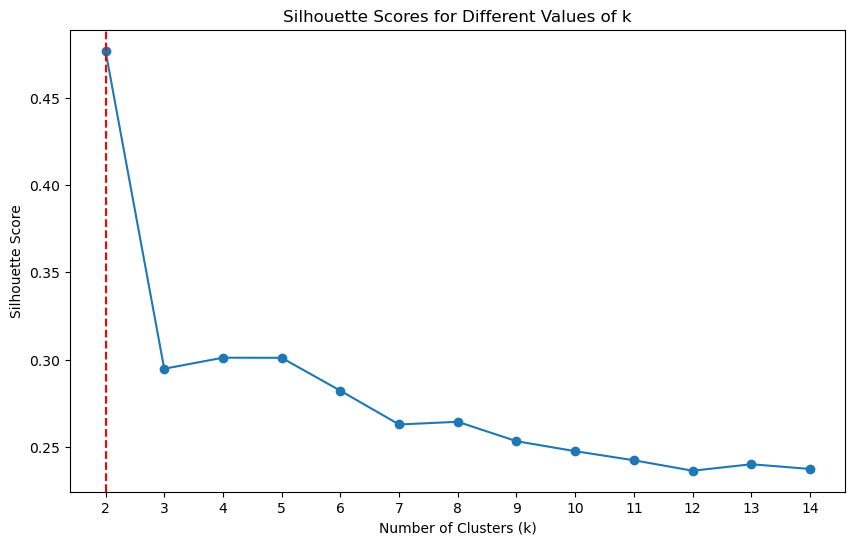

Silhouette scores plotted.


In [316]:
plt.figure(figsize=(10, 6))
plt.plot(k, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Values of k')
plt.xticks(k)
plt.axvline(x=np.argmax(silhouette_scores) + 2, color='r', linestyle='--', label='Optimal k')
plt.show()

print("Silhouette scores plotted.")

Optimal number of clusters based on silhouette score: 2


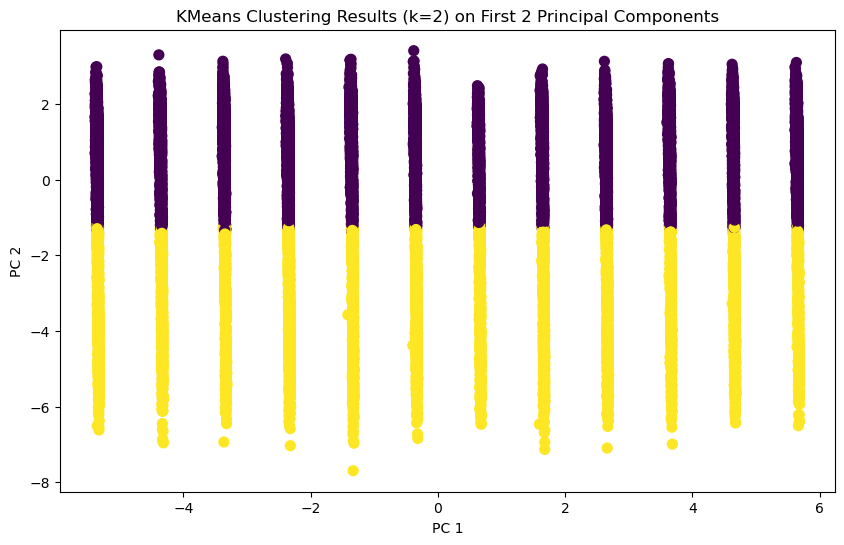

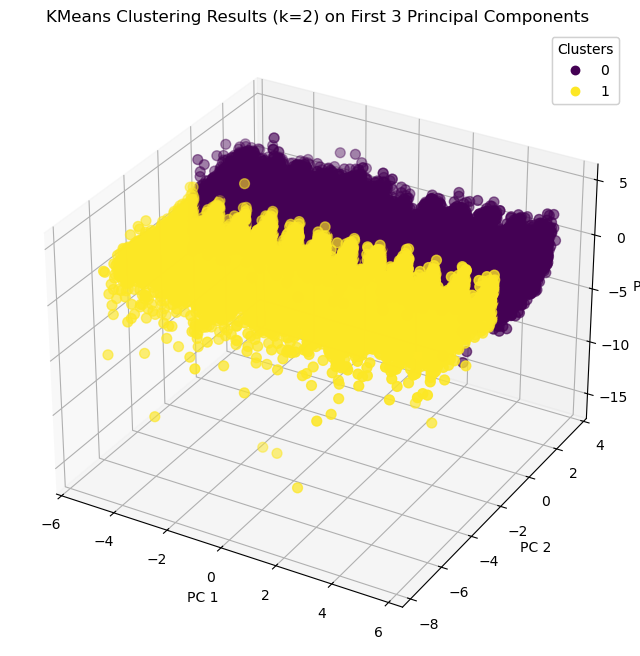

In [317]:
optimal_k = k[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")
kmeans = KMeans(n_clusters=optimal_k, random_state=random_seed)
kmeans.fit(cluster_components)
labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=labels, cmap='viridis', s=50)
plt.title(f'KMeans Clustering Results (k={optimal_k}) on First 2 Principal Components')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()
# Create a figure and a 3D subplot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three principal components
scatter = ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=labels, cmap='viridis', s=50)

# Set labels and title
ax.set_title(f'KMeans Clustering Results (k={optimal_k}) on First 3 Principal Components')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

# Add a color bar to show the cluster labels
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

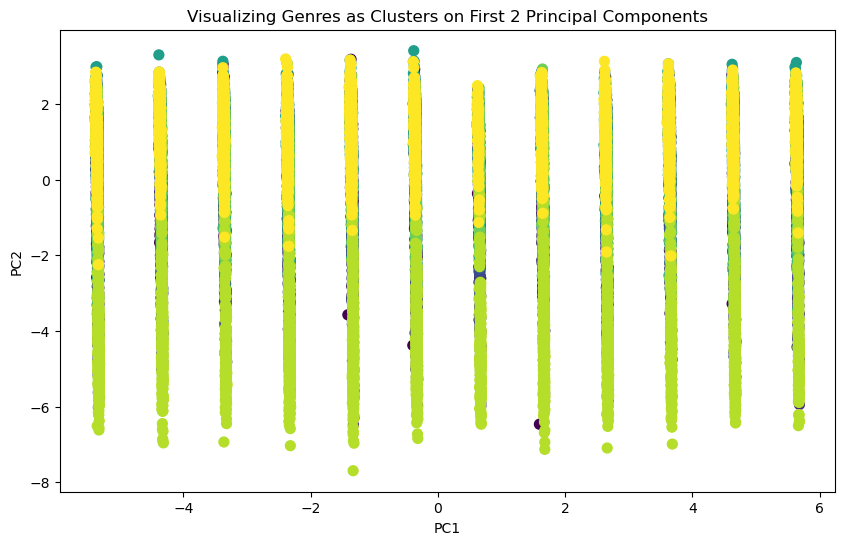

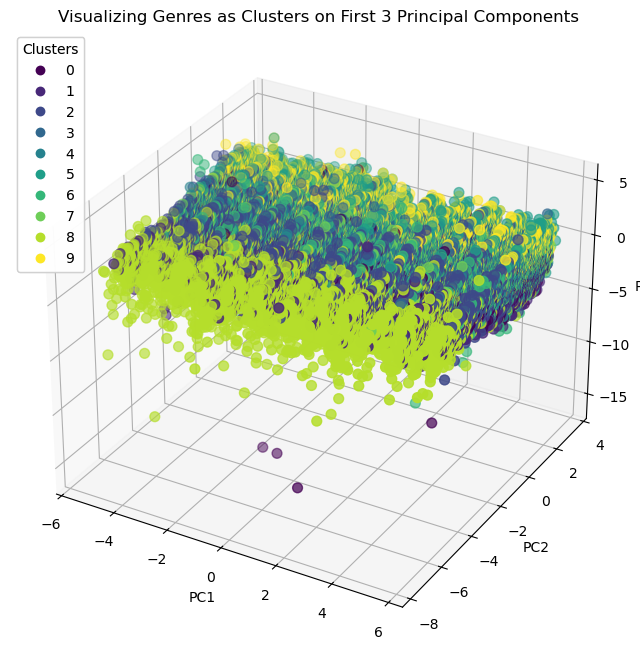

In [318]:
#Visualizing genres as clusters
i = 0
comp = components
plt.figure(figsize=(10, 6))
plt.scatter(comp[:, i], comp[:, i+1], c=y_train, cmap='viridis', s=50)
plt.title(f'Visualizing Genres as Clusters on First 2 Principal Components')
plt.xlabel('PC' + str(i + 1))
plt.ylabel('PC' + str(i + 2))
plt.show()
# Create a figure and a 3D subplot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three principal components
scatter = ax.scatter(comp[:, i], comp[:, i+1], comp[:, i+2], c=y_train, cmap='viridis', s=50)

# Set labels and title
ax.set_title(f'Visualizing Genres as Clusters on First 3 Principal Components')
ax.set_xlabel('PC' + str(i + 1))
ax.set_ylabel('PC' + str(i + 2))
ax.set_zlabel('PC' + str(i + 3))

# Add a color bar to show the cluster labels
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [319]:
print(np.unique(labels))

[0 1]


In [320]:
temp = np.column_stack((labels, X_train[:, 12]))
temp

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 1],
       [0, 0]], dtype=object)

In [321]:
components.shape

(45000, 4)

In [322]:
X_train_scored = components

In [323]:
X_train_scored.shape

(45000, 4)

##### Processing test set

In [324]:
X_test

array([[47.0, 0.357, 0.44, ..., 0.115, 9, 1],
       [26.0, 0.0915, 0.755, ..., 0.618, 3, 1],
       [27.0, 0.0495, 0.7140000000000001, ..., 0.391, 3, 0],
       ...,
       [70.0, 0.54, 0.7909999999999999, ..., 0.284, 11, 1],
       [60.0, 0.013, 0.8029999999999999, ..., 0.6729999999999999, 12, 0],
       [73.0, 0.00823, 0.857, ..., 0.0658, 4, 0]], dtype=object)

In [325]:
X_test_scaled = scaler.transform(X_test[:, :11])
X_test_scaled = np.column_stack((X_test_scaled, X_test[:, 11:]))
X_test_pca = pca.transform(X_test_scaled)[:, :4]
X_test_labels = kmeans.predict(X_test_pca[:,1:4])
X_test_scored = X_test_pca
print(X_test_scored.shape)

(5000, 4)


## Trying different classification models

In [326]:
average_auc = {}

In [327]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(5000, 10)

### Logistic regression

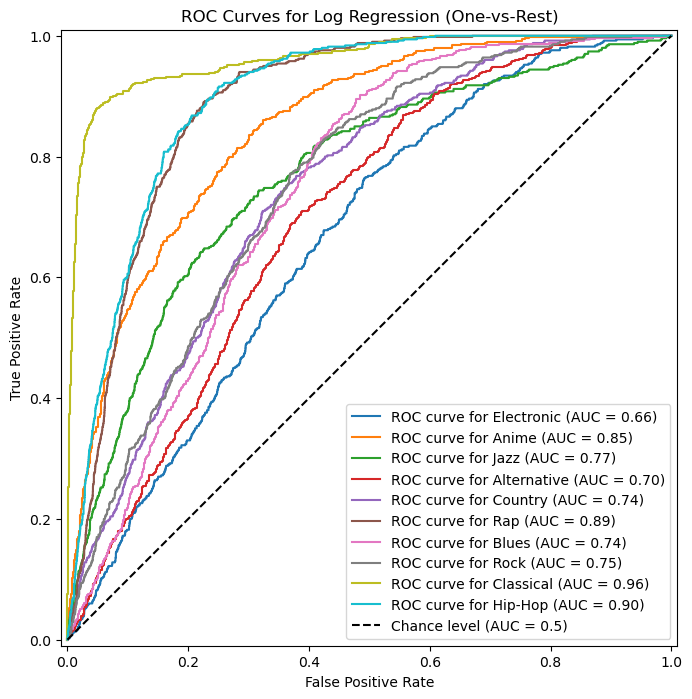

In [328]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the PCA components and cluster labels
logistic_model = LogisticRegression(max_iter=1000, random_state=random_seed)
logistic_model.fit(X_train_scored, y_train)
# Predict probabilities on the test set
# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Get class names by inverting the genre_codes dictionary
class_names = {v: k for k, v in genre_codes.items()}

# Get the decision scores for all classes
y_score = logistic_model.predict_proba(X_test_scored)

# Number of classes based on the binarized labels
num_classes = y_onehot_test.shape[1]
auc = []
# Plot ROC curve for each class
for i in range(num_classes):
    # Get the actual class value corresponding to the column index i
    class_id = label_binarizer.classes_[i]
    # Get the class name from the mapping
    class_label = class_names.get(class_id, f"Class {class_id}")

    # Plot the ROC curve for the current class using its true labels and scores
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],  # True binary labels for class i
        y_score[:, i],        # Scores for class i
        name=f"ROC curve for {class_label}",
        ax=ax                 # Plot on the same axes
    )
    auc.append(metrics.roc_auc_score(y_onehot_test[:, i], y_score[:, i]))

# Add plot customizations
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)") # Add chance line
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curves for Log Regression (One-vs-Rest)")
ax.legend() # Show legend for all plotted curves
plt.show()

average_auc_val = np.mean(auc)
average_auc["LogisticRegression"] = average_auc_val

Log reg w/o cluster labels

In [329]:
# from sklearn.linear_model import LogisticRegression

# # Train a logistic regression model on the PCA components and cluster labels
# logistic_model = LogisticRegression(max_iter=1000, random_state=random_seed)
# logistic_model.fit(X_train_scored[:,:-1], y_train)
# # Predict probabilities on the test set
# # Create a figure and axes for the plot
# fig, ax = plt.subplots(figsize=(10, 8))

# # Get class names by inverting the genre_codes dictionary
# class_names = {v: k for k, v in genre_codes.items()}

# # Get the decision scores for all classes
# y_score = logistic_model.predict_proba(X_test_scored[:,:-1])

# # Number of classes based on the binarized labels
# num_classes = y_onehot_test.shape[1]
# auc = []
# # Plot ROC curve for each class
# for i in range(num_classes):
#     # Get the actual class value corresponding to the column index i
#     class_id = label_binarizer.classes_[i]
#     # Get the class name from the mapping
#     class_label = class_names.get(class_id, f"Class {class_id}")

#     # Plot the ROC curve for the current class using its true labels and scores
#     RocCurveDisplay.from_predictions(
#         y_onehot_test[:, i],  # True binary labels for class i
#         y_score[:, i],        # Scores for class i
#         name=f"ROC curve for {class_label}",
#         ax=ax                 # Plot on the same axes
#     )
#     auc.append(metrics.roc_auc_score(y_onehot_test[:, i], y_score[:, i]))

# # Add plot customizations
# ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)") # Add chance line
# ax.set_xlabel("False Positive Rate")
# ax.set_ylabel("True Positive Rate")
# ax.set_title("ROC Curves for Log Regression (One-vs-Rest)")
# ax.legend() # Show legend for all plotted curves
# plt.show()

# average_auc_val = np.mean(auc)
# average_auc["LogisticRegression w/o Cluster labels"] = average_auc_val

### Trying SVM

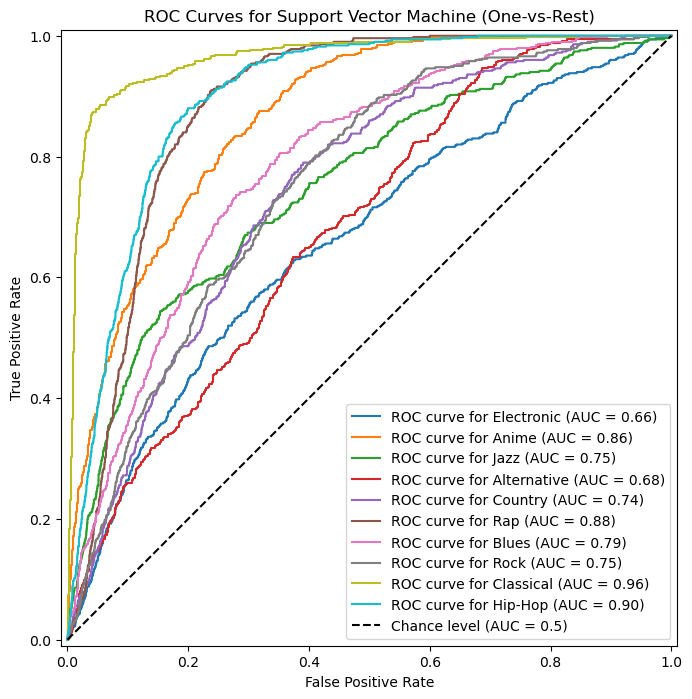

In [330]:
from sklearn.svm import SVC
# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(random_state=random_seed)
svm_classifier.fit(X_train_scored, y_train)
# Predict on the test set
y_pred = svm_classifier.predict(X_test_scored)
# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Get class names by inverting the genre_codes dictionary
class_names = {v: k for k, v in genre_codes.items()}

# Get the decision scores for all classes
# For SVM, decision_function returns scores for each class
y_score = svm_classifier.decision_function(X_test_scored)

# Number of classes based on the binarized labels
num_classes = y_onehot_test.shape[1]
# Plot ROC curve for each class
for i in range(num_classes):
    # Get the actual class value corresponding to the column index i
    class_id = label_binarizer.classes_[i]
    # Get the class name from the mapping
    class_label = class_names.get(class_id, f"Class {class_id}")

    # Plot the ROC curve for the current class using its true labels and scores
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],  # True binary labels for class i
        y_score[:, i],        # Scores for class i
        name=f"ROC curve for {class_label}",
        ax=ax                 # Plot on the same axes
    )
    auc.append(metrics.roc_auc_score(y_onehot_test[:, i], y_score[:, i]))
# Add plot customizations
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)") # Add chance line
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curves for Support Vector Machine (One-vs-Rest)")
ax.legend() # Show legend for all plotted curves
plt.show()

average_auc_val = np.mean(auc)
average_auc["SVM"] = average_auc_val

### Trying Random Forest

In [331]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=random_seed)
clf.fit(X_train_scored, y_train)
y_pred_rf = clf.predict(X_test_scored)

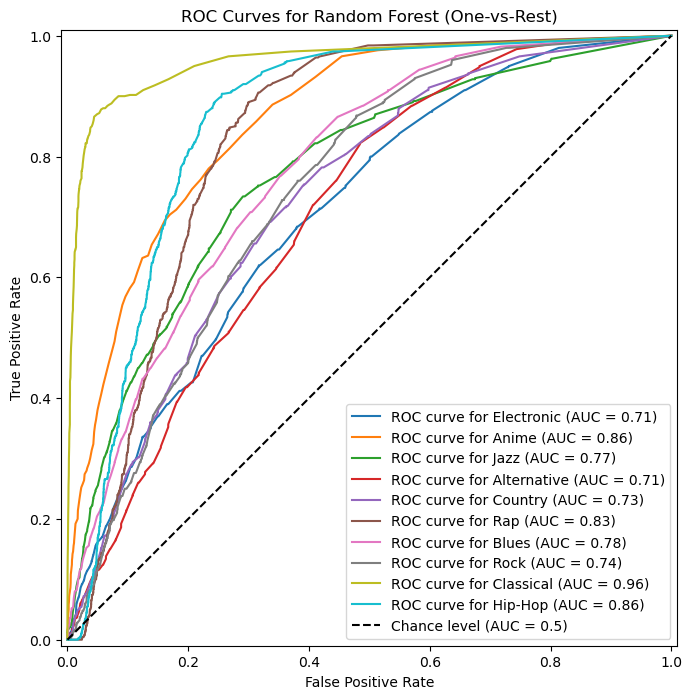

In [332]:
# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Get class names by inverting the genre_codes dictionary
class_names = {v: k for k, v in genre_codes.items()}

# Get the decision scores for all classes
# For RandomForest, predict_proba returns probabilities for each class
y_score = clf.predict_proba(X_test_scored)

# Number of classes based on the binarized labels
num_classes = y_onehot_test.shape[1]
aucs = []
# Plot ROC curve for each class
for i in range(num_classes):
    # Get the actual class value corresponding to the column index i
    class_id = label_binarizer.classes_[i]
    # Get the class name from the mapping
    class_label = class_names.get(class_id, f"Class {class_id}")

    # Plot the ROC curve for the current class using its true labels and scores
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],  # True binary labels for class i
        y_score[:, i],        # Scores for class i
        name=f"ROC curve for {class_label}",
        ax=ax                 # Plot on the same axes
    )
    aucs.append(metrics.roc_auc_score(y_onehot_test[:, i], y_score[:, i]))

# Add plot customizations
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)") # Add chance line
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curves for Random Forest (One-vs-Rest)")
ax.legend() # Show legend for all plotted curves
plt.show()
average_auc_val = np.mean(aucs)
average_auc["RandomForest"] = average_auc_val

Trying adaboost

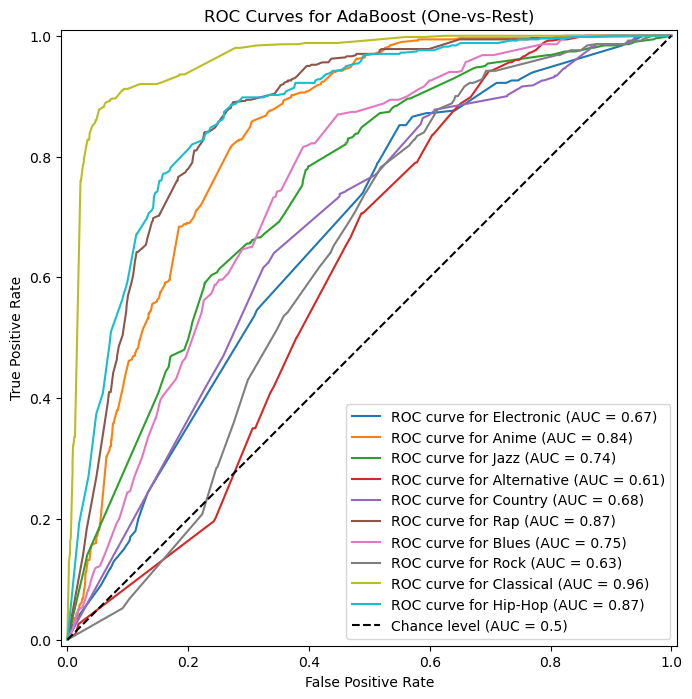

In [333]:
from sklearn.ensemble import AdaBoostClassifier

bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=100, learning_rate=1
)

bdt.fit(X_train_scored, y_train)
y_pred_bdt = bdt.predict(X_test_scored)


# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Get class names by inverting the genre_codes dictionary
class_names = {v: k for k, v in genre_codes.items()}

# Get the decision scores for all classes
y_score = bdt.decision_function(X_test_scored)

# Number of classes based on the binarized labels
num_classes = y_onehot_test.shape[1]
aucs= []
# Plot ROC curve for each class
for i in range(num_classes):
    # Get the actual class value corresponding to the column index i
    class_id = label_binarizer.classes_[i]
    # Get the class name from the mapping
    class_label = class_names.get(class_id, f"Class {class_id}")

    # Plot the ROC curve for the current class using its true labels and scores
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],  # True binary labels for class i
        y_score[:, i],        # Scores for class i
        name=f"ROC curve for {class_label}",
        ax=ax                 # Plot on the same axes
    )
    aucs.append(metrics.roc_auc_score(y_onehot_test[:, i], y_score[:, i]))

# Add plot customizations
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)") # Add chance line
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curves for AdaBoost (One-vs-Rest)")
ax.legend() # Show legend for all plotted curves
plt.show()

average_auc_val = np.mean(aucs)
average_auc["AdaBoost"] = average_auc_val

trying bagging

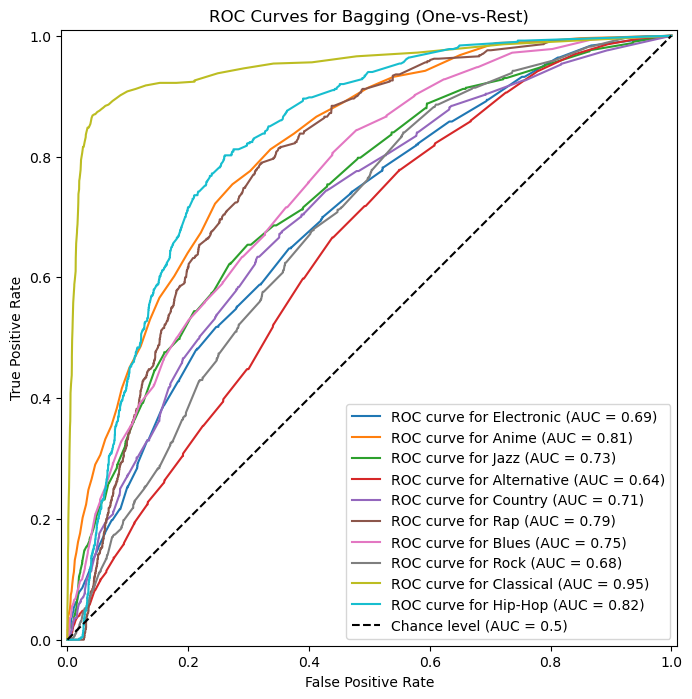

In [334]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(estimator=tree.DecisionTreeClassifier(criterion='gini'),
                       n_estimators=100, max_samples=1.0, max_features=0.5,bootstrap=True)
clf.fit(X_train_scored, y_train)
y_pred_bagging = clf.predict(X_test_scored)

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Get class names by inverting the genre_codes dictionary
class_names = {v: k for k, v in genre_codes.items()}

# Get the decision scores for all classes
y_score = clf.predict_proba(X_test_scored)

# Number of classes based on the binarized labels
num_classes = y_onehot_test.shape[1]
aucs = []
# Plot ROC curve for each class
for i in range(num_classes):
    # Get the actual class value corresponding to the column index i
    class_id = label_binarizer.classes_[i]
    # Get the class name from the mapping
    class_label = class_names.get(class_id, f"Class {class_id}")

    # Plot the ROC curve for the current class using its true labels and scores
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],  # True binary labels for class i
        y_score[:, i],        # Scores for class i
        name=f"ROC curve for {class_label}",
        ax=ax                 # Plot on the same axes
    )
    aucs.append(metrics.roc_auc_score(y_onehot_test[:, i], y_score[:, i]))
    

mean_auc = np.mean(aucs)
average_auc["Bagging"] = mean_auc

# Add plot customizations
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)") # Add chance line
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curves for Bagging (One-vs-Rest)")
ax.legend() # Show legend for all plotted curves
plt.show()

Trying MLP

In [335]:
from sklearn.neural_network import MLPClassifier

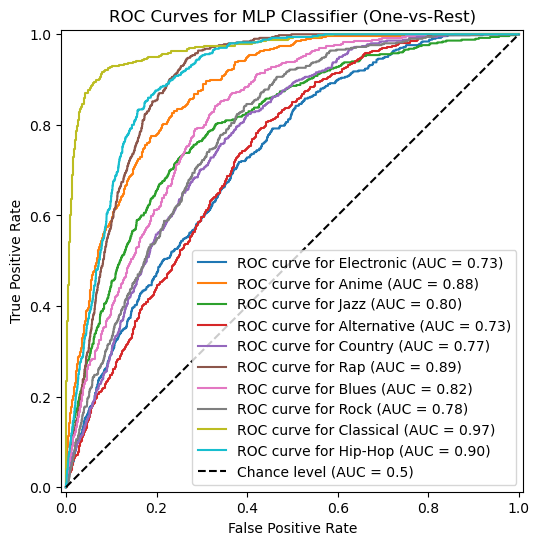

MLP Classifier Accuracy: 0.3650

MLP Classification Report:
              precision    recall  f1-score   support

  Electronic       0.27      0.22      0.24       500
       Anime       0.42      0.50      0.46       500
        Jazz       0.36      0.34      0.35       500
 Alternative       0.26      0.12      0.16       500
     Country       0.25      0.27      0.26       500
         Rap       0.32      0.27      0.29       500
       Blues       0.39      0.20      0.26       500
        Rock       0.24      0.44      0.31       500
   Classical       0.75      0.83      0.78       500
     Hip-Hop       0.38      0.46      0.42       500

    accuracy                           0.36      5000
   macro avg       0.36      0.36      0.35      5000
weighted avg       0.36      0.36      0.35      5000



In [336]:
# Instantiate the MLPClassifier
# Using a single hidden layer with 100 neurons as a starting point
# Increased max_iter for convergence
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=random_seed)

# Train the MLP model
mlp.fit(X_train_scored, y_train)

# Predict probabilities on the test set
y_score_mlp = mlp.predict_proba(X_test_scored)

# Plot ROC curves for MLP
fig_mlp, ax_mlp = plt.subplots(figsize=(10, 6))

# Get class names by inverting the genre_codes dictionary
class_names = {v: k for k, v in genre_codes.items()}

# Number of classes based on the binarized labels
num_classes = y_onehot_test.shape[1]
aucs = []
# Plot ROC curve for each class
for i in range(num_classes):
    # Get the actual class value corresponding to the column index i
    class_id = label_binarizer.classes_[i]
    # Get the class name from the mapping
    class_label = class_names.get(class_id, f"Class {class_id}")

    # Plot the ROC curve for the current class using its true labels and scores
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],  # True binary labels for class i
        y_score_mlp[:, i],    # Scores for class i from MLP
        name=f"ROC curve for {class_label}",
        ax=ax_mlp             # Plot on the MLP axes
    )
    aucs.append(metrics.roc_auc_score(y_onehot_test[:, i], y_score_mlp[:, i]))

# Add plot customizations
ax_mlp.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)") # Add chance line
ax_mlp.set_xlabel("False Positive Rate")
ax_mlp.set_ylabel("True Positive Rate")
ax_mlp.set_title("ROC Curves for MLP Classifier (One-vs-Rest)")
ax_mlp.legend() # Show legend for all plotted curves
plt.show()

average_auc_val = np.mean(aucs)
average_auc["MLP"] = average_auc_val

# Optionally, calculate and print accuracy
y_pred_mlp = mlp.predict(X_test_scored)
accuracy_mlp = metrics.accuracy_score(y_test, y_pred_mlp)
print(f"MLP Classifier Accuracy: {accuracy_mlp:.4f}")

# Print classification report for more detailed metrics
print("\nMLP Classification Report:")
print(metrics.classification_report(y_test, y_pred_mlp, target_names=[class_names[i] for i in sorted(class_names.keys())]))

Forward feed neural net

In [337]:
import torch
from torch import nn

class FNN(nn.Module):
    def __init__(self, input_size, n_hidden, output_size, activation = None, hidden_layers = 2):
        super(FNN, self).__init__()
        self.input_size = input_size
        if activation == None:
            self.activation = None
            self.network = nn.Sequential(
                nn.Linear(input_size, n_hidden),
                nn.Linear(n_hidden, output_size)
            )
        else:
            if activation =='relu':
                self.activation = nn.ReLU()  
            elif activation == 'sigmoid':
                self.activation = nn.Sigmoid()
            self.hidden_layers = hidden_layers

            layers = []

            layers.append(nn.Linear(input_size, n_hidden))
            layers.append(self.activation)
            
            # Add the specified number of hidden layers
            for _ in range(hidden_layers - 1):
                layers.append(nn.Linear(n_hidden, n_hidden))
                layers.append(self.activation)
            
            # Output layer
            layers.append(nn.Linear(n_hidden, output_size))
            
            # model
            self.network = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(-1, self.input_size)      
        return self.network(x)

In [338]:
learning_rate = 1e-2
lambda_l2 = 1e-3
epochs = 500

In [339]:
def training(model, X_train, y_train, epochs=epochs, lr=learning_rate, loss_func = nn.CrossEntropyLoss()):
    X_train = torch.as_tensor(X_train, dtype=torch.float)
    y_train = torch.as_tensor(y_train).long()
    loss_arr = []
    auc_arr = []
    model.train()
    criterion = loss_func
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
    for epoch in range(epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        _, predicted = torch.max(y_pred, 1)
        pred_probs = torch.softmax(y_pred, dim=1)[:, 1]
        print("[EPOCH]: %i, [LOSS]: %.6f" % (epoch, loss.item()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def test(model, X_test, y_onehot_test):
    X_test = torch.as_tensor(X_test, dtype=torch.float)
    y_onehot_test = torch.as_tensor(y_onehot_test).long()
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    pred_probs = torch.softmax(y_pred, dim=1).detach().numpy()
    return pred_probs

    

[EPOCH]: 0, [LOSS]: 2.312329
[EPOCH]: 1, [LOSS]: 2.308229
[EPOCH]: 2, [LOSS]: 2.304187
[EPOCH]: 3, [LOSS]: 2.300200
[EPOCH]: 4, [LOSS]: 2.296266
[EPOCH]: 5, [LOSS]: 2.292383
[EPOCH]: 6, [LOSS]: 2.288548
[EPOCH]: 7, [LOSS]: 2.284761
[EPOCH]: 8, [LOSS]: 2.281020
[EPOCH]: 9, [LOSS]: 2.277323
[EPOCH]: 10, [LOSS]: 2.273668
[EPOCH]: 11, [LOSS]: 2.270055
[EPOCH]: 12, [LOSS]: 2.266482
[EPOCH]: 13, [LOSS]: 2.262949
[EPOCH]: 14, [LOSS]: 2.259453
[EPOCH]: 15, [LOSS]: 2.255994
[EPOCH]: 16, [LOSS]: 2.252570
[EPOCH]: 17, [LOSS]: 2.249181
[EPOCH]: 18, [LOSS]: 2.245825
[EPOCH]: 19, [LOSS]: 2.242504
[EPOCH]: 20, [LOSS]: 2.239215
[EPOCH]: 21, [LOSS]: 2.235959
[EPOCH]: 22, [LOSS]: 2.232736
[EPOCH]: 23, [LOSS]: 2.229543
[EPOCH]: 24, [LOSS]: 2.226382
[EPOCH]: 25, [LOSS]: 2.223251
[EPOCH]: 26, [LOSS]: 2.220150
[EPOCH]: 27, [LOSS]: 2.217078
[EPOCH]: 28, [LOSS]: 2.214036
[EPOCH]: 29, [LOSS]: 2.211021
[EPOCH]: 30, [LOSS]: 2.208036
[EPOCH]: 31, [LOSS]: 2.205079
[EPOCH]: 32, [LOSS]: 2.202149
[EPOCH]: 33, [LOSS]:

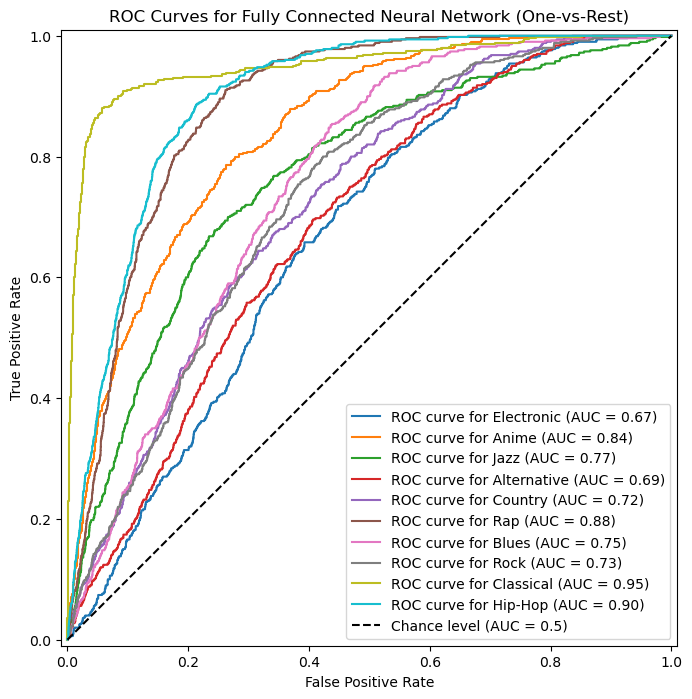

In [340]:
neural_net = FNN(input_size=X_train_scored.shape[1], n_hidden=200, output_size=len(np.unique(y_train)), activation='relu', hidden_layers=2)
# Train the neural network
training(neural_net, X_train_scored, y_train, epochs=epochs, lr=learning_rate)
pred_probs = test(neural_net, X_test_scored, y_onehot_test)
# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Get class names by inverting the genre_codes dictionary
class_names = {v: k for k, v in genre_codes.items()}

# Get the decision scores for all classes
y_score = pred_probs

# Number of classes based on the binarized labels
num_classes = y_onehot_test.shape[1]
aucs = []
# Plot ROC curve for each class
for i in range(num_classes):
    # Get the actual class value corresponding to the column index i
    class_id = label_binarizer.classes_[i]
    # Get the class name from the mapping
    class_label = class_names.get(class_id, f"Class {class_id}")

    # Plot the ROC curve for the current class using its true labels and scores
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],  # True binary labels for class i
        y_score[:, i],        # Scores for class i
        name=f"ROC curve for {class_label}",
        ax=ax                 # Plot on the same axes
    )
    aucs.append(metrics.roc_auc_score(y_onehot_test[:, i], y_score[:, i]))

average_auc_val = np.mean(aucs)
average_auc["NeuralNetwork"] = average_auc_val

# Add plot customizations
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)") # Add chance line
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curves for Fully Connected Neural Network (One-vs-Rest)")
ax.legend() # Show legend for all plotted curves
plt.show()

## Tuning Multi-Layer Perceptron

In [341]:
# hidden_layer_sizes = [50, 100, 200]
# activation_functions = ['relu', 'sigmoid']
# alpha_values = [1e-3, 1e-2, 1e-1]
# lr = [1e-3, 1e-2, 1e-1]

# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'hidden_layer_sizes': hidden_layer_sizes,
#     'activation': activation_functions,
# }
# # Create the MLPClassifier
# mlp_grid = MLPClassifier(max_iter=500, random_state=random_seed)
# grid = GridSearchCV(estimator=mlp_grid, param_grid=param_grid, scoring = 'roc_auc_ovr')
# grid.fit(X_train_scored, y_train)
# # Print the best parameters and score
# print("Best parameters found: ", grid.best_params_)
# print("Best ROC AUC score: ", grid.best_score_)

MLP model without clustering step

In [342]:
# # Instantiate the MLPClassifier
# # Using a single hidden layer with 100 neurons as a starting point
# # Increased max_iter for convergence
# mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=random_seed)

# # Train the MLP model
# mlp.fit(X_train_scored[:, :-1], y_train)

# # Predict probabilities on the test set
# y_score_mlp = mlp.predict_proba(X_test_scored[:, :-1])
# aucs = []
# # Plot ROC curves for MLP
# fig_mlp, ax_mlp = plt.subplots(figsize=(10, 6))

# # Get class names by inverting the genre_codes dictionary
# class_names = {v: k for k, v in genre_codes.items()}

# # Number of classes based on the binarized labels
# num_classes = y_onehot_test.shape[1]

# # Plot ROC curve for each class
# for i in range(num_classes):
#     # Get the actual class value corresponding to the column index i
#     class_id = label_binarizer.classes_[i]
#     # Get the class name from the mapping
#     class_label = class_names.get(class_id, f"Class {class_id}")

#     # Plot the ROC curve for the current class using its true labels and scores
#     RocCurveDisplay.from_predictions(
#         y_onehot_test[:, i],  # True binary labels for class i
#         y_score_mlp[:, i],    # Scores for class i from MLP
#         name=f"ROC curve for {class_label}",
#         ax=ax_mlp             # Plot on the MLP axes
#     )
#     aucs.append(metrics.roc_auc_score(y_onehot_test[:, i], y_score_mlp[:, i]))

# # Add plot customizations
# ax_mlp.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)") # Add chance line
# ax_mlp.set_xlabel("False Positive Rate")
# ax_mlp.set_ylabel("True Positive Rate")
# ax_mlp.set_title("ROC Curves for MLP Classifier without Cluster Labels(One-vs-Rest)")
# ax_mlp.legend() # Show legend for all plotted curves
# plt.show()
# average_auc_val = np.mean(aucs)
# average_auc["MLP_no_cluster_labels"] = average_auc_val

# # Optionally, calculate and print accuracy
# y_pred_mlp = mlp.predict(X_test_scored[:, :-1])
# accuracy_mlp = metrics.accuracy_score(y_test, y_pred_mlp)
# print(f"MLP Classifier Accuracy: {accuracy_mlp:.4f}")

# # Print classification report for more detailed metrics
# print("\nMLP Classification Report:")
# print(metrics.classification_report(y_test, y_pred_mlp, target_names=[class_names[i] for i in sorted(class_names.keys())]))

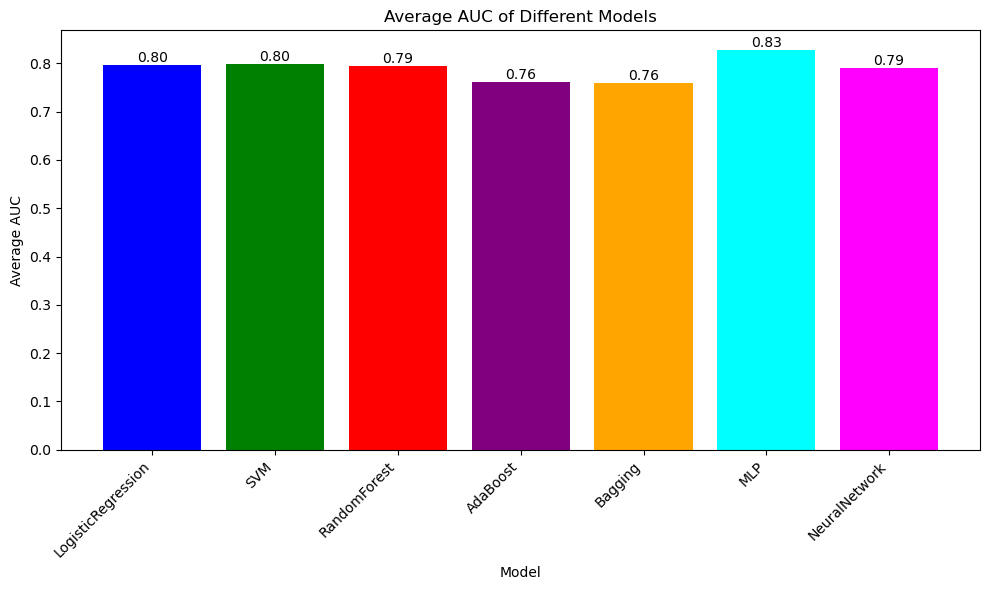

In [343]:
import matplotlib.pyplot as plt

# Define a list of colors for each model
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown']

# Create a histogram of models and their average AUC
plt.figure(figsize=(10, 6))
bars = plt.bar(average_auc.keys(), average_auc.values(), color=colors)

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Average AUC')
plt.title('Average AUC of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

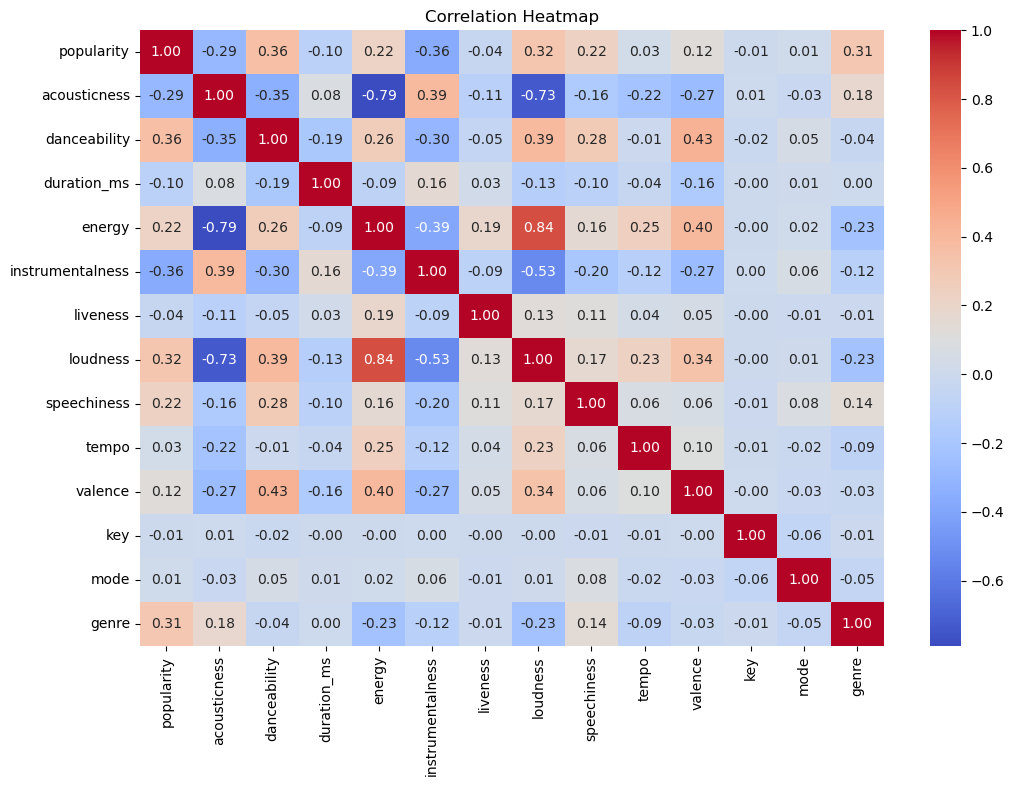

In [344]:
import seaborn as sns

data
feature_names.append('genre')
temp = np.column_stack((data, genre_dummy_coded))
# Create a DataFrame from the data array for correlation calculation
data_df = pd.DataFrame(temp, columns=feature_names)

# Calculate the correlation matrix
correlation_matrix = data_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()